<a href="https://www.kaggle.com/code/hemaestro/pirated-movies-analysis?scriptVersionId=122614971" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-from-piracy-website/movies_dataset.csv


Hello Kagglers, 

Before we start, I want to thank the data contributor **Arsalan ur Rehman** for this wonderful dataset. We will be looking at a dataset that has been scraped from a piracy website like Soap2day , HD2day. Its important to understand that none of these piracy websites do have their very own servers and they do not collect and store movies in to their server, they are just utilizing an existing server. 

Looking at the dataset, we can see that the main columns are: <br/>

**id**: movie's unique id <br/>
**title**: movie's name<br/>
**storyline**: a short description of the movie <br/>
**views**: no. of clicks per movie <br/>
**downloads**: no. of downloads per movie <br/>
**IMDb-rating**: ratings <br/>
**appropriate_for**: R-rated, PG-13, etc<br/>
**language**: this can be multiple languages also<br/>
**industry**: Hollywood, Bollywood, etc.<br/>
**posted_date**: when the movie was posted on the platform<br/>
**release_date**: when the movie was released worldwide <br/>
**runtime**: in minutes or hours <br/>
**director**: director's names <br/>
**writer**: list of all the writers <br/>

In [2]:
df = pd.read_csv('/kaggle/input/movies-dataset-from-piracy-website/movies_dataset.csv')
df = df.drop('Unnamed: 0',axis=1)
df


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,NaN,NaN,NaN,"1,998",28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,"6,219",NaN
20544,7.7,NaN,Bimal Roy,"6,080",28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,"16,376","Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,NaN,NaN,"3,276",30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,"7,220",NaN
20546,NaN,NaN,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,"1,419",NaN


This is how the dataset looks. Its clear from the initial glance that there are many missing values. We need to address this issue later but first see what the dataset can offer. 

# Aim of the Analysis:

Which industry is mostly affected by piracy?<br/>
Which movie has the highest pirated views and downloads?<br/>
What are the top 10 pirated movies of all time?<br/>
What is the average time interval for a movie to get posted on a pirated site?<br/>
**What is the trend for this piracy culture from the start year?**<br/>

Piracy movies have become a cultural phenomenon in many parts of the world. The act of illegally downloading or streaming movies has become normalized among certain groups, who view it as a way to access content that may not be readily available or affordable through legal means. Some even see it as a form of rebellion against the corporate control of the entertainment industry. The proliferation of piracy has led to a complex web of ethical, legal, and economic issues, with some arguing that it harms creators and the industry as a whole, while others see it as a way to democratize access to culture. Regardless of one's stance, it is clear that piracy movies have become an enduring part of modern popular culture. This is why I decided to come with a trend chart for how long before a movie is posted online. 

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      19707 non-null  float64
 1   appropriate_for  11072 non-null  object 
 2   director         18610 non-null  object 
 3   downloads        20547 non-null  object 
 4   id               20548 non-null  int64  
 5   industry         20547 non-null  object 
 6   language         20006 non-null  object 
 7   posted_date      20547 non-null  object 
 8   release_date     20547 non-null  object 
 9   run_time         18780 non-null  object 
 10  storyline        18847 non-null  object 
 11  title            20547 non-null  object 
 12  views            20547 non-null  object 
 13  writer           18356 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.2+ MB


Lets check how many values are missing.

In [4]:

missing_value_counts = df.isnull().sum()
missing_value_counts.sum()

18464

This does look like a lot of empty blanks right? Bear with me this is nothing actually. We are not looking at the NaN rows, we are just looking at NaN cells.

Lets check how much of a percentage the missing values constitute.


In [5]:
total_values = np.product(df.shape)
numerator = missing_value_counts.sum()
miss_p  = (numerator/ total_values)*100
print(" The percentage of missing values from the dataset is :", miss_p)

 The percentage of missing values from the dataset is : 6.4184209794488165


Here, mostly the missing values are empty because they weren't recorded properly not because they do not exist. So, we try to guess the NAN's by replacing them with perfectly suitable values like *means* or *medians* if numerical. But for categorical values like *director, Rating, storyline* we cannot replace them with anything suitable.

In [6]:
missing_value_counts


IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

Its better to replace the missing values with their average or median in the case of numericals. Doing that to the IMDb-rating would be better than 0 ratings, although we are just doing this for the sake of filling valid data into the empty fields, we are not using the IMDB ratings variable in our current Analysis, but for runtime the average method could be useful.

In [7]:
df['IMDb-rating']=df['IMDb-rating'].fillna(np.mean(df['IMDb-rating']))


#Next we deal with appropriate_for, they are categorical variables. 

In [8]:
df['appropriate_for']=df['appropriate_for'].fillna('Unrated')

df['appropriate_for'] =df['appropriate_for'].replace('Not Rated', 'Unrated')

In [9]:
df['appropriate_for'].value_counts()

Unrated           11750
R                  4384
PG-13              1968
PG                  886
TV-14               694
TV-MA               406
G                   152
TV-PG               115
TV-G                 99
TV-Y7                45
TV-Y                 25
Approved              9
NC-17                 4
TV-Y7-FV              3
Passed                3
MA-17                 1
TV-13                 1
Drama                 1
Drama, Romance        1
18+                   1
Name: appropriate_for, dtype: int64

In [10]:
#one null value now replaced with 0
# df['views'].fillna('0')
df['views']=df['views'].fillna('0')
df['views'].isnull().sum()
df['views'] = df['views'].apply(lambda x:(x.replace(',', ''))).astype(int)
df['views']


0         2794
1         1002
2        14419
3         4878
4         2438
         ...  
20543     6219
20544    16376
20545     7220
20546     1419
20547     6697
Name: views, Length: 20548, dtype: int64

In [11]:
df['title'].value_counts()
#as we can see here, there are 202-402 instances of teh same movie, this could be an error

The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Adventures of Aladdin                              1
Madhumati                                          1
Name: title, Length: 16572, dtype: int64

In [12]:
counts = df['title'].value_counts()
counts = counts[counts>76]

In [13]:
duplicate_titles=counts.index.tolist()
duplicate_titles

['The Girl Who Escaped: The Kara Robinson Story',
 'Vaathi',
 'Who Invited Charlie?',
 'Little Dixie',
 'The Inspection',
 'WWE Smackdown 2023-02-10',
 'Consent',
 'Vacation Home Nightmare',
 'Your Place or Mine',
 'Baby Ruby',
 'Carnifex',
 'Marlowe',
 'Shehzada',
 'TNA.Impact 2023-02-09',
 'WWE Raw 2023-02-13']

In [14]:
def fix_dup(dt,x):
    val_temp = 0
    temp= []

    val_temp=math.ceil(np.mean(x[x['title']==dt]['views']))
    temp=x[x['title']==dt].iloc[0]
    print(temp)

    x= x.drop(x[x['title']==dt].index)

    x = x.append(temp,ignore_index = True)
    x.loc[x['title'] == dt, 'views'] = val_temp
    return x


In [15]:
for i in duplicate_titles:
    df = fix_dup(i,df)

IMDb-rating                                                      6.6
appropriate_for                                                TV-14
director                                                Simone Stock
downloads                                                        760
id                                                            371877
industry                                         Hollywood / English
language                                                     English
posted_date                                             15 Feb, 2023
release_date                                             Feb 11 2023
run_time                                                          88
storyline          It follows Kara Robinson as she survives an ab...
title                  The Girl Who Escaped: The Kara Robinson Story
views                                                           7430
writer                                                  Haley Harris
Name: 28, dtype: object
IMDb-ratin

In [16]:
df.shape
#Here, 3362 rows were dropped becuase of duplicity 

(17186, 14)

A function was developed below to convert any format of time from the dataset to a datetime format.

In [17]:
import re
def conv_runtime(runtime):
    if runtime.isdigit():
        return int(runtime)
    else:
        # Define regular expressions to extract numerical values
        hr_pattern = re.compile(r'(\d+)\s*(h|hr|hour)s?')
        min_pattern = re.compile(r'(\d+)\s*(m|min)')

        # Extract numerical values from the input string
        hrs = 0
        mins = 0
        match = hr_pattern.search(runtime)
        if match:
            hrs = int(match.group(1))
        match = min_pattern.search(runtime)
        if match:
            mins = int(match.group(1))

        # Convert hours to minutes and return the total runtime in minutes
        return hrs * 60 + mins

In [18]:
#Replaced the NaN values with the average run time of movies
df['run_time'] = df['run_time'].fillna('90')

In [19]:
#Convert all the values of run_time to a standard int format
df['run_time'] = df['run_time'].apply(conv_runtime)

In [20]:
#dropped industry with null value 
df=df.drop(df[df['id']==371111].index, axis=0)

In [21]:
#in our analysis we do not require the columns director, storyline, writer. We can drop them
df = df.drop(['director', 'writer','storyline'], axis=1)
df

,IMDb-rating,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
0,6.400000,TV-PG,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Grilling Season: A Curious Caterer Mystery,1002
1,5.200000,R,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,107,In the Earth,14419
2,4.600000,Unrated,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,Alone,2438
3,5.400000,Unrated,746,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,Anubhavinchu Raja,2940
4,5.762151,TV-PG,"5,332",372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,WWE Elimination Chamber,11978
...,...,...,...,...,...,...,...,...,...,...,...
17181,4.700000,Unrated,"1,453",371943,Hollywood / English,English,"16 Feb, 2023",Dec 01 2022,93,Carnifex,11756
17182,6.100000,R,283,371876,Hollywood / English,English,"15 Feb, 2023",Feb 15 2023,110,Marlowe,3149
17183,9.000000,Unrated,"12,954",372039,Bollywood / Indian,Hindi,"18 Feb, 2023",Feb 17 2023,142,Shehzada,36237
17184,5.762151,Unrated,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,90,TNA.Impact 2023-02-09,1380


In [22]:
#Lets store for further analysis in future
# df_null_lang = df[df.isnull().any(axis=1)]
# df_null_lang['industry'].value_counts()

# df_null_lang

In [23]:
# I am dropping the Languages column to make sure we have no null values left to deal with.
# I could've replaced the null values with appropriate fillings but we are not using the languages column anyway

df_cleaned = df.drop('language', axis=1)
df_cleaned.isnull().sum()

IMDb-rating        0
appropriate_for    0
downloads          0
id                 0
industry           0
posted_date        0
release_date       0
run_time           0
title              0
views              0
dtype: int64

In [24]:
#Now for the final step in the cleaning, we need to convert the dates both posted and released in to a standard format.
from datetime import datetime
def conv_posted_date(v):
    format_1 = '%d %b, %Y'
    date = datetime.strptime(v,format_1)
    return date
def conv_release_date(v):
    format_1 = '%b %d %Y'
    date = datetime.strptime(v,format_1)
    return date
    

In [25]:
df_cleaned['posted_date'] = df_cleaned['posted_date'].apply(conv_posted_date)
df_cleaned['release_date'] = df_cleaned['release_date'].apply(conv_release_date)
df_cleaned

,IMDb-rating,appropriate_for,downloads,id,industry,posted_date,release_date,run_time,title,views
0,6.400000,TV-PG,73,372091,Hollywood / English,2023-02-20,2023-02-05,84,Grilling Season: A Curious Caterer Mystery,1002
1,5.200000,R,"1,427",343381,Hollywood / English,2021-04-20,2021-06-18,107,In the Earth,14419
2,4.600000,Unrated,657,372089,Tollywood,2023-02-20,2023-01-26,122,Alone,2438
3,5.400000,Unrated,746,372088,Tollywood,2023-02-20,2021-11-26,131,Anubhavinchu Raja,2940
4,5.762151,TV-PG,"5,332",372059,Wrestling,2023-02-19,2023-02-18,200,WWE Elimination Chamber,11978
...,...,...,...,...,...,...,...,...,...,...
17181,4.700000,Unrated,"1,453",371943,Hollywood / English,2023-02-16,2022-12-01,93,Carnifex,11756
17182,6.100000,R,283,371876,Hollywood / English,2023-02-15,2023-02-15,110,Marlowe,3149
17183,9.000000,Unrated,"12,954",372039,Bollywood / Indian,2023-02-18,2023-02-17,142,Shehzada,36237
17184,5.762151,Unrated,309,371669,Wrestling,2023-02-10,2023-02-09,90,TNA.Impact 2023-02-09,1380


# Which Industry is Mostly affected by piracy?

In [26]:
import matplotlib.pyplot as plt
x=[]
industry_rate=df_cleaned['industry'].value_counts().values
industry_name = df_cleaned['industry'].value_counts().index
for i in industry_rate:
    x.append((0.5)*i + 0.5*1700)
# industry_rate

The **industry_rate** variable is very wide with values too large and too small in a very small bandwidth. Displaying them on a graph could make smaller values almost invisible. To avoid that, I am going to substitute the values in a function as shown above **(1-a)*A + 0.5*B**. The 'a' can be 0.5 as choice and A is the values of the **industry_rate**, while B is the value you want to normalize with, here I chose 1700 as it is the middle value for the **industry_rate** list. 

Text(0.5, 0, 'Movie Industry')

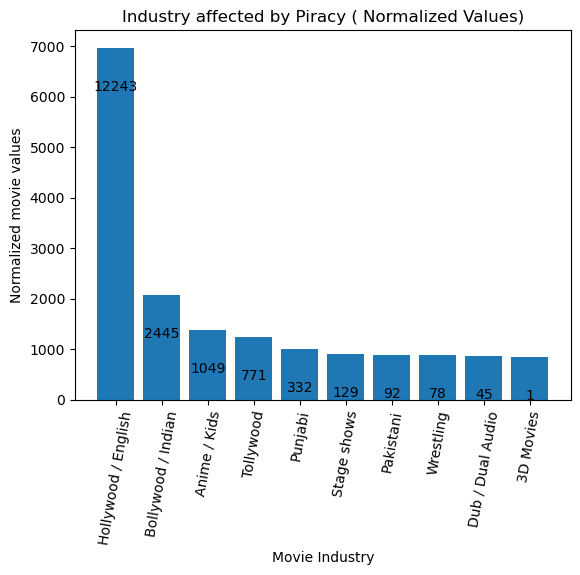

In [27]:
fig, ax = plt.subplots()

ax.bar(industry_name, x)
plt.xticks(rotation=80)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
addlabels(industry_name,industry_rate)
plt.title('Industry affected by Piracy ( Normalized Values)')
plt.ylabel('Normalized movie values')
plt.xlabel('Movie Industry')


Digits on the bar are the actual number of movies per Industry. 

As we can see here, the most affected industry is Hollywood, English movies. Bollywood being second. I have normalized the ranges of values per industry to make a better impactful visulaization, because using the exactly same values might not provide great insight into the industry specifics becuase it looks like this:

Text(0, 0.5, 'Movie Industry')

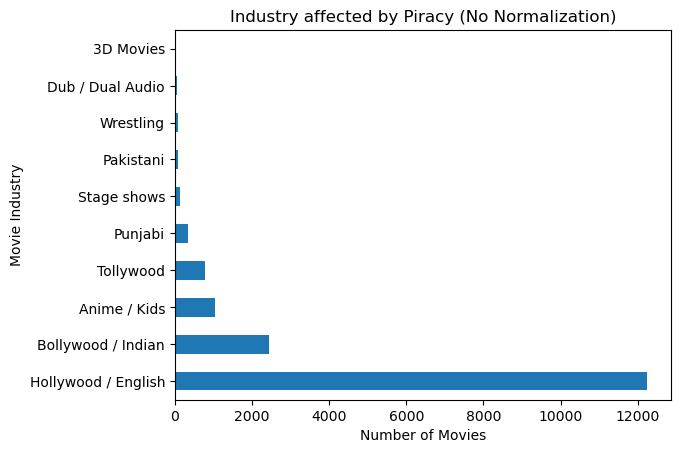

In [28]:
df_cleaned['industry'].value_counts().plot(kind='barh')
plt.title('Industry affected by Piracy (No Normalization)')
plt.xlabel('Number of Movies')
plt.ylabel('Movie Industry')

This however might seem right but mostly the values are so low that they aren't even visible. Thats true compare to the values we have here, 3D movies has just 1 movie pirated and Hollywood has 12243 values pirated, there is a huge difference, thats why I decided to normalize the values.

# Which movie has the highest pirated views and downloads?

In [29]:
vd =df_cleaned[['title','views', 'industry']].sort_values(by='views', ascending=False)
vd

,title,views,industry
6993,Baaghi 2,1638533,Bollywood / Indian
7400,Tiger Zinda Hai,1038317,Bollywood / Indian
6585,Raid,993825,Bollywood / Indian
4666,Avengers: Endgame,991133,Hollywood / English
6643,Avengers: Infinity War,969673,Hollywood / English
...,...,...,...
358,TNA.Impact 2022-12-08,888,Wrestling
548,TNA.Impact 2022-11-03,873,Wrestling
502,TNA.Impact 2022-11-10,852,Wrestling
2749,Free Byrd,698,Hollywood / English


Text(0.5, 1.0, 'Highest viewed pirated Movies')

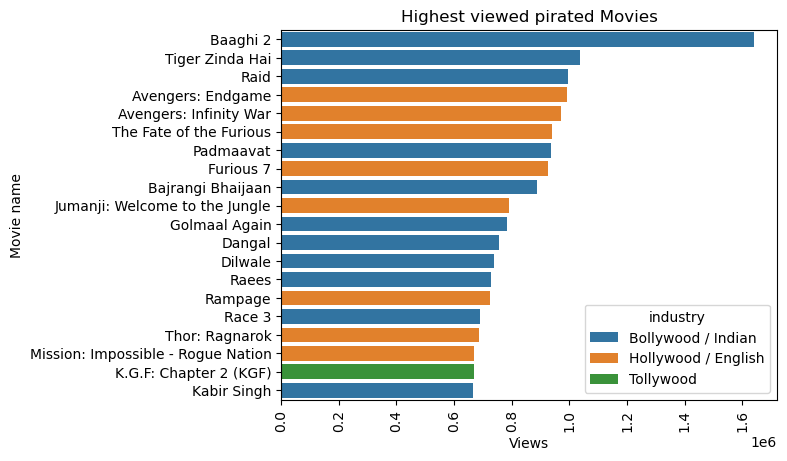

In [30]:
import seaborn as sns
# vd = vd[0:20]
# vd
sns.barplot(data=vd[0:20], y='title', x='views', hue = 'industry', orient='h', dodge=False)
plt.ylabel('Movie name')
plt.xlabel('Views')
plt.xticks(rotation=90)
plt.title('Highest viewed pirated Movies')

In [31]:
vd[0:10]['title']

6993                           Baaghi 2
7400                    Tiger Zinda Hai
6585                               Raid
4666                  Avengers: Endgame
6643             Avengers: Infinity War
7945            The Fate of the Furious
7266                          Padmaavat
10620                         Furious 7
10425                 Bajrangi Bhaijaan
7250     Jumanji: Welcome to the Jungle
Name: title, dtype: object

Based on the previous analysis for which industry is mostly affected by piracy, we saw Hollywood taking the top spot. But for the analysis of number of views, we can see most of the mvoies are from Bollywood. Based on this observation we can see that most Hollywood movies are being pirated but the watch rate for Bollywood movies is higher than that of Hollywood, even with more movies.

Most viewed movie in the pirated website is **Baaghi 2**, its a Bollywood/Indian Film with more than **1.6 million** views

# What are the top 10 pirated movies of all time?

The owrd pirated movies concers the availability of the prouct without copyrights or permissions. Considering thid definition, its safe to assume that the top 10 pirated movies are the ones that are mostly viewed online rather than downloads. 

According to the barchart above, we can say that the top 10 pirated movies are:

Baaghi 2 <br/>
Tiger Zinda Hai<br/>
Raid<br/>
Avengers: Endgame<br/>
Avengers: Infinity War<br/>
The Fate of the Furious<br/>
Padmaavat<br/>
Furious 7<br/>
Bajrangi Bhaijaan<br/>
Jumanji: Welcome to the Jungle

# Which movies have the highest downloads?

In [32]:
# Looks like I forgot to clean the commas from the downloads.
df_cleaned['downloads']
def clean_commas(v):
    v = v.replace(',','')
    return int(v)
df_cleaned['downloads'] = df_cleaned['downloads'].apply(clean_commas)   

Text(0.5, 1.0, 'Highest downloaded pirated Movies ')

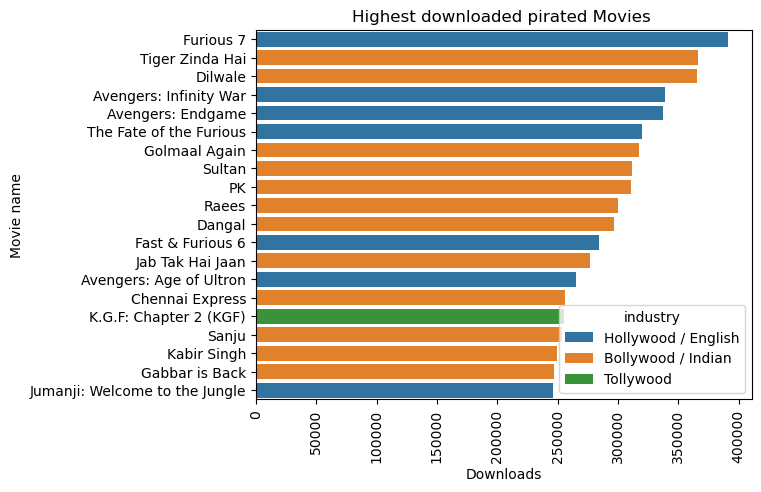

In [33]:
vd1 = df_cleaned[['title','downloads', 'industry']].sort_values(by='downloads', ascending=False)
sns.barplot(data=vd1[0:20], y='title', x='downloads', hue = 'industry', orient='h', dodge=False)
plt.ylabel('Movie name')
plt.xlabel('Downloads')
plt.xticks(rotation=90)
plt.title('Highest downloaded pirated Movies ')

The graph above shows the most downloaded movies from the piracy website. Here, we can see that even though the number of Hollywood movies are more in count, the downloads and views are mostly for Bollywood movies. 

The most downloaded movie from the piracy website is **Furious 7**, this is a Hollywood/ English movie with **~ 400K** downloads. 

# What is the average time interval for a movie to get posted on a pirated site?

I am just going to develop a simple function called **time_diff** to see the differences in the posted date and release date, that is to see the average time interval. But that cannot be relied upon. I will tell you why in the coming step.

In [34]:
def time_diff(d):
    x=[]
    for i in range(0,len(d)):
        cc=d['posted_date'].iloc[i] - d['release_date'].iloc[i]
        x.append(cc.days)
    return x

  

Here, I am subsetting data frame into major industry categories to help us better analyse the issues.

In [35]:
df_bolly = df_cleaned[(df_cleaned['industry'] == 'Bollywood / Indian') | (df_cleaned['industry'] =='Punjabi')]
df_holly = df_cleaned[df_cleaned['industry'] == 'Hollywood / English']
df_tolly = df_cleaned[df_cleaned['industry'] == 'Tollywood']
df_anime = df_cleaned[df_cleaned['industry'] == 'Anime / Kids']
df_other = df_cleaned[(df_cleaned['industry'] != 'Anime / Kids') &
                      (df_cleaned['industry'] !='Tollywood') &
                      (df_cleaned['industry'] !='Hollywood / English') &
                      (df_cleaned['industry'] !='Bollywood / Indian') &
                      (df_cleaned['industry'] !='Punjabi')]

Text(0.5, 1.0, 'Release dates')

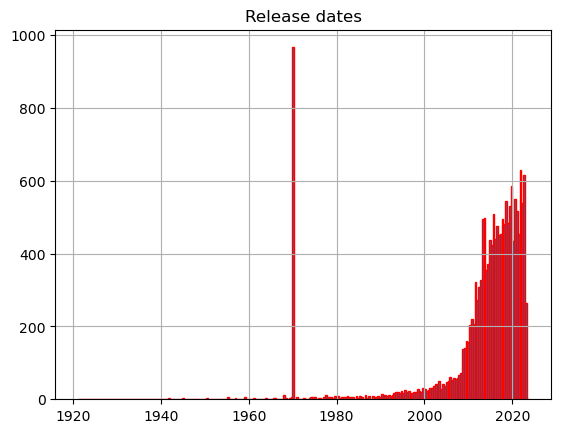

In [36]:
years=[]
for i in range(0,len(df_cleaned)):
    years.append(df_cleaned['release_date'].iloc[i].year)
count_years =pd.Series(years).value_counts()
# # count_years[count_years>1]
# plt.hist(df_cleaned, edgecolor="red", bins=5)
df_cleaned['release_date'].hist(edgecolor="red", bins=250)
plt.title('Release dates')

As we can see above, there is an abnormal rise in the release of movies in 1970. Lets see if that is the case, we can do seperate anlaysis on the same year. 

In [37]:
year_1970=df_cleaned[df_cleaned['release_date'].dt.year == 1970]['release_date']
year_1970.value_counts()

1970-01-01    962
1970-12-24      2
1970-04-02      1
1970-06-19      1
1970-10-16      1
1970-11-11      1
1970-03-06      1
1970-05-12      1
1970-04-10      1
1970-04-08      1
Name: release_date, dtype: int64

As we can see here, the movies released in 1970 jan 1st are 962 movies.
Ok, After a lot of research on the dates, I have concluded that 962 movies were not released in the 1970 Jan 1st. I know it took time for something so obvious, but I just wanted to make sure.

I believe that there was a default setting to replace the values of release_dates to 1970-01-01 becuase the data collection process could not scrape the data from the website or maybe there wasn't a date at all. This goes the same with the posted_date too. 

**Hear me out !!!!!!**

A title in Wrestling called **WWE Raw 2023-01-23** is clearly a 2023 aired show and its release_date is **1970-01-01**.
Another title in Anime/Kids **Ben 10: Alien Force** has its release date and posted date as **1970-01-01**. I've watched Ben 10 as a kid and I can guarantee you that I am definitely not that old.

So, our next step is to ignore the titles with dates **1970-01-01** as their release_date.


<AxesSubplot:>

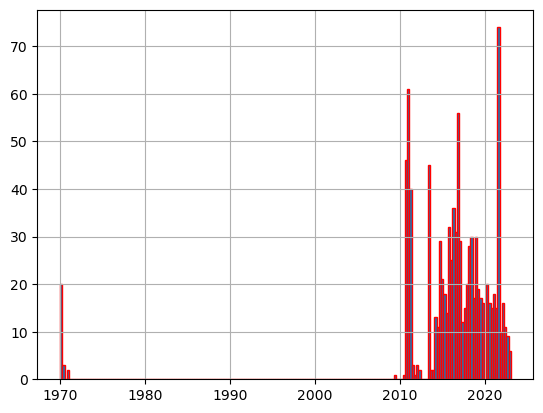

In [38]:
df_cleaned[df_cleaned['release_date'].dt.year == 1970]['posted_date'].hist(edgecolor="red", bins=200)

Here, there is an intersting observation. The movie **The AristoCats** was actually released in 1970. The date of release in correct but the posted date is not becuase we know for a fact that no one uploaded a movie to a pirated website in the **year 1970**.

To get a better, accurate time interval for a movie titles release and posting. We better delete the year 1970. 

In [39]:
df_cleaned[df_cleaned['release_date'].dt.year == 1970][(df_cleaned['posted_date'].dt.year == 1970)]['release_date'].mode().iloc[0]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Timestamp('1970-01-01 00:00:00')

In [40]:

bbg=df_cleaned[df_cleaned['release_date'].dt.year == 1970][(df_cleaned['posted_date'].dt.year == 1970)]['release_date']
bbg.mode().iloc[0]
df_cleaned = df_cleaned.loc[df_cleaned['release_date']!= bbg.mode().iloc[0]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

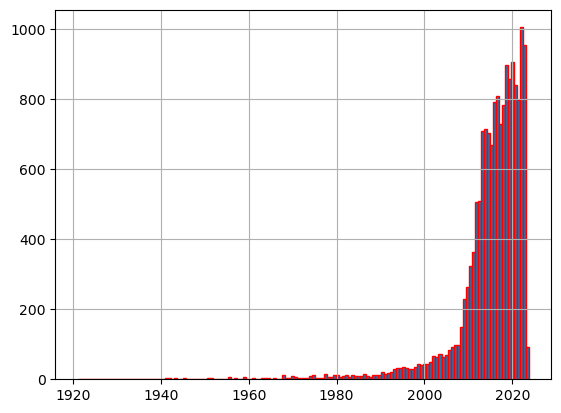

In [41]:
df_cleaned['release_date'].hist(edgecolor='red',bins=150)

Its safe to say that there were no pirted websites before 1993 because, 1993 was the year of a first ever video server. Before that there were no video servers and no video streams. So, we only consider titles after the year 1993.

In [42]:
# df_cleaned['release_date'].dt.year.value_counts()
df_cleaned[df_cleaned['release_date'].dt.year == 1938]


,IMDb-rating,appropriate_for,downloads,id,industry,posted_date,release_date,run_time,title,views
17123,7.6,Approved,41145,920,Anime / Kids,1970-01-01,1938-02-03,83,Snow White and the Seven Dwarfs,66860


This movie is legit, it was released in 1938. But it was not posted in 1970. So, we can ignore incorrectly dated rows in our analysis.

In [43]:
ff_df=df_cleaned
ff_df= df_cleaned[df_cleaned['release_date'].dt.year > 1993]
# df_cleaned = df_cleaned.loc[df_cleaned['release_date']!= bb_1993]
# bb_1993
ff_df

,IMDb-rating,appropriate_for,downloads,id,industry,posted_date,release_date,run_time,title,views
0,6.400000,TV-PG,73,372091,Hollywood / English,2023-02-20,2023-02-05,84,Grilling Season: A Curious Caterer Mystery,1002
1,5.200000,R,1427,343381,Hollywood / English,2021-04-20,2021-06-18,107,In the Earth,14419
2,4.600000,Unrated,657,372089,Tollywood,2023-02-20,2023-01-26,122,Alone,2438
3,5.400000,Unrated,746,372088,Tollywood,2023-02-20,2021-11-26,131,Anubhavinchu Raja,2940
4,5.762151,TV-PG,5332,372059,Wrestling,2023-02-19,2023-02-18,200,WWE Elimination Chamber,11978
...,...,...,...,...,...,...,...,...,...,...
17181,4.700000,Unrated,1453,371943,Hollywood / English,2023-02-16,2022-12-01,93,Carnifex,11756
17182,6.100000,R,283,371876,Hollywood / English,2023-02-15,2023-02-15,110,Marlowe,3149
17183,9.000000,Unrated,12954,372039,Bollywood / Indian,2023-02-18,2023-02-17,142,Shehzada,36237
17184,5.762151,Unrated,309,371669,Wrestling,2023-02-10,2023-02-09,90,TNA.Impact 2023-02-09,1380


<AxesSubplot:>

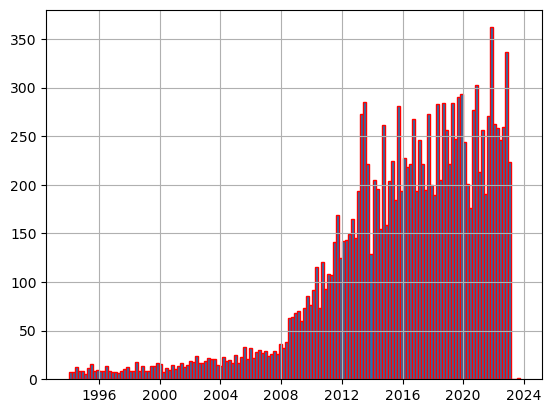

In [44]:
ff_df['release_date'].hist(edgecolor='red',bins=150)

Here, I am calculating the differences between the release date and posted date. Since we are dealing with movies in the Internet Era, i.e after 1993, we can get accurate results in the average time to be posted after release. 

However, we have an issue to be addressed, which is the wrongly recorded dates for titles. This could be due to various reasons, One I have observed was for the **Movie In the Earth**, the movie was released woldwide on **16 April 2021** but the data says it was released on **18th June 2021, this is because the movie was released in HULU on that date.** This means that the data collection process took the dates of some movies based on their releases on different platform. SO, technically we can ignore these dates of releases as wrongly labelled.



In [45]:
time_diffs = time_diff(ff_df)
temp3=[]
for i in time_diffs:
    
    if i>0:
        temp3.append(i)
print(math.ceil(np.mean(temp3)),  'days is the Average time for a movie to get posted after its release in the Internet Era')
        

351 days is the Average time for a movie to get posted after its release in the Internet Era


In [46]:
# How many movies were posted before their release date a.k.a incorrectly recorded title dates.

print('No of movies that with wrong dates: ',len(time_diffs) - len(temp3))
print('Percentage of movies that have wrong dates:', ((len(time_diffs) - len(temp3))/len(ff_df))*100)

No of movies that with wrong dates:  1979
Percentage of movies that have wrong dates: 12.578656327464566


The temp3 variable has the differences of movies from their release to posting which means that, any negative value in the temp3 value can be ignored becuase they are wrongly labelled. Taking only the positive values can give us the average time interval for a movie to get posted after its release.

Although, we have calculated the average time, I think that due to the advancement in technology these days, we need to consider the average time of release per decade.

In [47]:
df_2022 = ff_df[ff_df['release_date'].dt.year == 2022]
df_2022

td_2022 = time_diff(df_2022)
temp4=[]
for i in td_2022:
    
    if i>0:
        temp4.append(i)
print(math.ceil(np.mean(temp4)),  'days is the Average time for a movie to get posted after its release in the year 2022')

25 days is the Average time for a movie to get posted after its release in the year 2022


In [48]:
df_2021 = ff_df[ff_df['release_date'].dt.year == 2021]
df_2021

td_2021 = time_diff(df_2021)
temp5=[]
for i in td_2021:
    
    if i>0:
        temp5.append(i)
print(math.ceil(np.mean(temp5)),  'days is the Average time for a movie to get posted after its release in the year 2021')

65 days is the Average time for a movie to get posted after its release in the year 2021


In [49]:
years_main=ff_df['release_date'].dt.year.value_counts()
years_avg=[]
years_num=[]
for i in years_main.index:
    gg = time_diff(ff_df[ff_df['release_date'].dt.year == i])
    temp5=[]
    for j in gg:
        if j>0:
            temp5.append(j)
    years_avg.append(np.mean(temp5))
    years_num.append(i)
    print(math.ceil(np.mean(temp5)),'days is the Average time for a movie to get posted after its release in the year ',i)
    
    
    

25 days is the Average time for a movie to get posted after its release in the year  2022
137 days is the Average time for a movie to get posted after its release in the year  2019
65 days is the Average time for a movie to get posted after its release in the year  2021
129 days is the Average time for a movie to get posted after its release in the year  2018
76 days is the Average time for a movie to get posted after its release in the year  2020
121 days is the Average time for a movie to get posted after its release in the year  2016
130 days is the Average time for a movie to get posted after its release in the year  2017
110 days is the Average time for a movie to get posted after its release in the year  2013
132 days is the Average time for a movie to get posted after its release in the year  2015
138 days is the Average time for a movie to get posted after its release in the year  2014
99 days is the Average time for a movie to get posted after its release in the year  2012
95 

In [50]:
trends = dict(zip(years_num, years_avg))
trends.keys()
myKeys = list(trends.keys())
myKeys.sort()
sorted_dict = {i: trends[i] for i in myKeys}
 


Text(0, 0.5, 'Number of days on average to be posted')

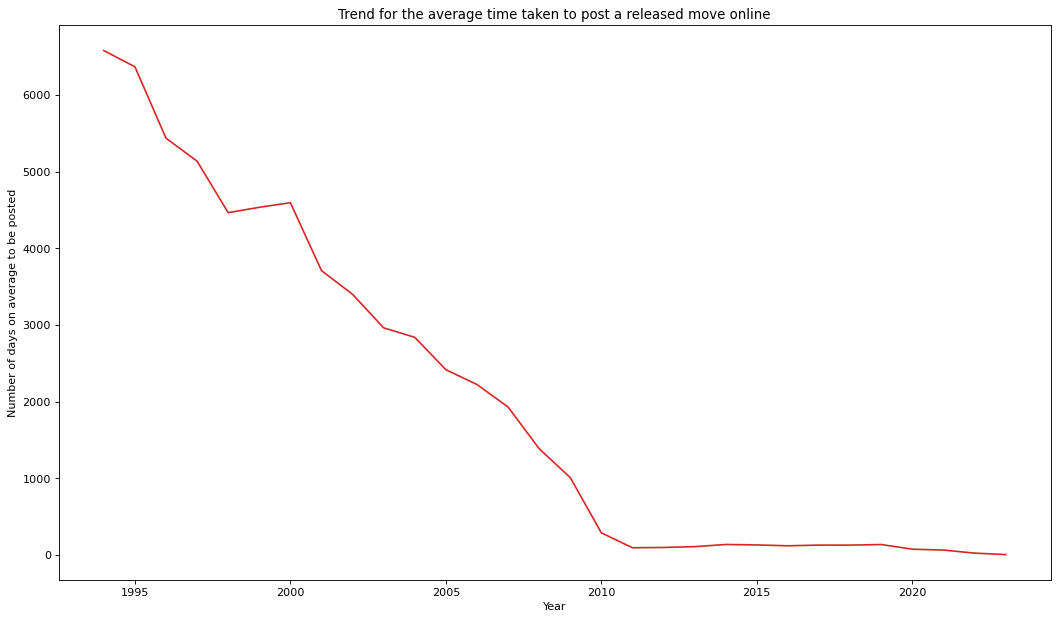

In [51]:
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(sorted_dict.keys(), sorted_dict.values(), color='tab:red')
plt.title('Trend for the average time taken to post a released move online')
plt.xlabel('Year')
plt.ylabel('Number of days on average to be posted')


As we are advancing with technology, it is becoming relatively easier to pirate movies and quicker for a movie to be posted online. This drop in the year 2008-2009 has marked an age for piracy in movies as they are relatively quicker to the servers and the average time of uploads being less that 10 days for some years like 2023. 

**Waiittttt!!!!!!!!!!!!!**

Although, this was insightful I believe that more there is always room for more analysis. I have some tasks for the fellow readers here. Please feel free to fork this notebook and edit it from your end, I'm sure there are many out there that can perfect the analysis.

**Tasks to look into:** <br/>

Perform similar analysis on the average time taken for a movie to be posted online per Industry.<br/>
Compare the industry wise average posting times.<br/>
Check the number of downloads per movie TV Ratings


Once again Thank you if you reached till here, also please feel free to fork this notebook and play around. Thank you.